<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/Visualize_Data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from pandas import read_csv, DataFrame
import numpy as np

df = read_csv('Device_Codes_session2.csv', header = 5)
df1 = read_csv('session2.csv', header = 0)

In [8]:
df1.head()

850nm     635nm     940nm      525nm
0  1356440.0 -853254.0  974923.0 -1432860.0
1  1357390.0 -853158.0  975467.0 -1431790.0
2  1356810.0 -853023.0  975480.0 -1432500.0
3  1357490.0 -852829.0  975723.0 -1431640.0
4  1357690.0 -852583.0  976371.0 -1432050.0

In [4]:
import seaborn as sns

col_dict = {1:'#7bc90c',
            -1:'#ffb700',
            3:'#f5072f',
            4:'#d109e3',
            5: "#009dff",
            6: "#10ccb6",
            0: "#6484f5",
            8: "#ab0e3a",
            9: "#bd9e15",
            7: 'grey',
           }

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), dpi = 200)

sns.lineplot(data = df)

In [5]:
import plotly.express as px
#df = read_csv('PPGfist1.csv', header = 0)
df['id'] = [x/250 for x in range(1, len(df.values)+1)]
#df.index.name = 'id'
df.head()



Ch : LED 2  Ch : LED 3  Ch : LED 1  Ch : LED 1 AMBIENT     id
0           5           5         125                   5  0.004
1          51          51        1382                  51  0.008
2         278         278        7483                 279  0.012
3        1002        1001       26721                1002  0.016
4        2704        2701       71574                2697  0.020

### Resampling data from 250 to 70

In [6]:
from scipy import signal

old_fs = 250
new_fs = 70
N = len(df)//old_fs*new_fs
df_rsp = signal.resample(df, N)
df_rsp =pd.DataFrame(df_rsp[:,:-1], columns=['630nm', '940nm','530nm','amb'])
df_rsp['id'] = [x/70 for x in range(1, len(df_rsp.values)+1)]

In [12]:
old_fs1 = 70
new_fs1 = 1
N1 = len(df1)//old_fs1*new_fs1
df_rsp1 = signal.resample(df1, N1)
df_rsp1 =pd.DataFrame(df_rsp1, columns=['850nm', '630nm','940nm','525nm'])
df_rsp1['id'] = [x for x in range(1, len(df_rsp1.values)+1)]

In [13]:
df_rsp1.head()

850nm          630nm         940nm         525nm  id
0  1.291134e+06 -954949.188172  1.056749e+06 -1.457768e+06   1
1  1.364951e+06 -833754.761815  9.583455e+05 -1.426135e+06   2
2  1.360319e+06 -862184.379016  9.954264e+05 -1.428762e+06   3
3  1.365402e+06 -845939.448435  9.663370e+05 -1.421982e+06   4
4  1.372678e+06 -856040.001860  9.894113e+05 -1.420408e+06   5

In [14]:
import plotly.express as px
import pandas as pd


fig = px.line(df_rsp, x="id", y='630nm') 
fig.show()



In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
signals = [x for x in df.columns.values if x != 'Time' and x != 'id']
for sig in signals:
  fig.add_trace(go.Scatter(x=df['id'], y=df[sig],
                    mode='lines',
                    name=sig))


fig.update_layout(margin=dict(l=100, r=100,b=100,t=100), width=1800, height=800)
fig.update_layout(title='PPG left data',
                   xaxis_title='Time',
                   yaxis_title='Amplitude')

In [17]:
import pandas as pd

#path = 'drive/Shareddrives/AIOT_LAB_DOCS/Data/MAData/'

#df = pd.read_csv(path +'PPGthumb1.csv', header = 0)
df1['id'] = [x/70 for x in range(1, len(df1.values)+1)]
#df.index.name = 'id'
df1.head()


850nm     635nm     940nm      525nm        id
0  1356440.0 -853254.0  974923.0 -1432860.0  0.014286
1  1357390.0 -853158.0  975467.0 -1431790.0  0.028571
2  1356810.0 -853023.0  975480.0 -1432500.0  0.042857
3  1357490.0 -852829.0  975723.0 -1431640.0  0.057143
4  1357690.0 -852583.0  976371.0 -1432050.0  0.071429

In [ ]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df1['id'], y=df1['850nm'],
                    mode='lines',
                    name='850nm'))
fig.add_trace(go.Scatter(x=df1['id'], y=df1['635nm'],
                    mode='lines',
                    name='630nm'))

fig.add_trace(go.Scatter(x=df1['id'], y=df1['940nm'],
                    mode='lines',
                    name='940nm'))

fig.add_trace(go.Scatter(x=df1['id'], y=df1['525nm'],
                    mode='lines',
                    name='525'))

fig.update_layout(margin=dict(l=100, r=100,b=100,t=100), width=1200, height=800)
fig.update_layout(title='PPG data',
                   xaxis_title='Samples',
                   yaxis_title='Amplitude')
#fig.add_trace(go.Scatter(x=random_x, y=random_y1, mode='lines+markers', name='lines+markers'))
#fig.add_trace(go.Scatter(x=random_x, y=random_y2, mode='markers', name='markers'))
fig.show()

In [ ]:
#df1.columns.values[0]
fig = go.Figure()
signals = [x for x in df1.columns.values if x != 'Time' and x != 'id']
for sig in signals:
  fig.add_trace(go.Scatter(x=df1['id'], y=df1[sig],
                    mode='lines',
                    name=sig))


fig.update_layout(margin=dict(l=100, r=100,b=100,t=100), width=1200, height=800)
fig.update_layout(title='PPG left data',
                   xaxis_title='Time',
                   yaxis_title='Amplitude')

### Display FFT

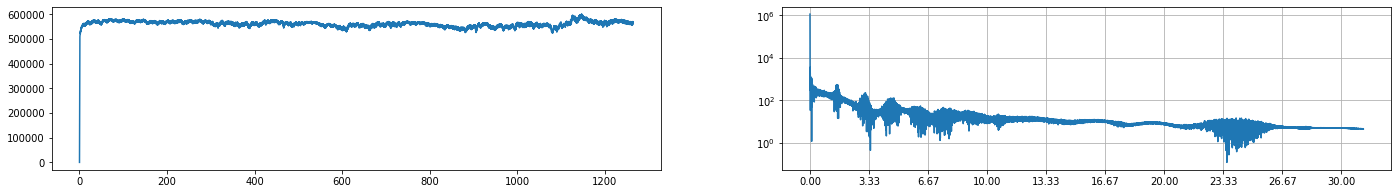

In [ ]:
from scipy import pi
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftfreq
# Number of sample points
N = np.shape(df)[0]
fs = 250
# sample spacing
T = 1.0 /fs
#y = df['Ch : LED 2'].values

x = np.linspace(0.0, N*T, N, endpoint=False)
y = df['Ch : LED 2'].values
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(24,3))

plt.subplot(1,2,1)
plt.plot (x,y)

plt.subplot(1,2,2)
L1, L2 = 0, 30
plt.plot(xf[:N//8], 2.0/N * np.abs(yf[:N//8]))
plt.xticks(np.linspace(L1, L2, 10) )
plt.yscale('log')
plt.grid()

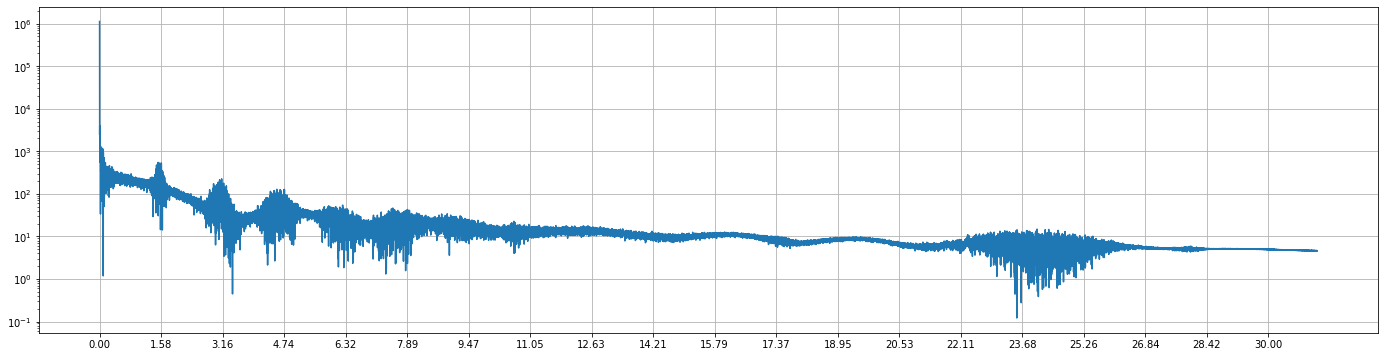

In [ ]:
plt.figure(figsize=(24,6))
L1, L2 = 0, 30
plt.plot(xf[:N//8], 2.0/N * np.abs(yf[:N//8]))
plt.xticks( np.linspace(L1, L2, 20) )
plt.yscale('log')
plt.grid()

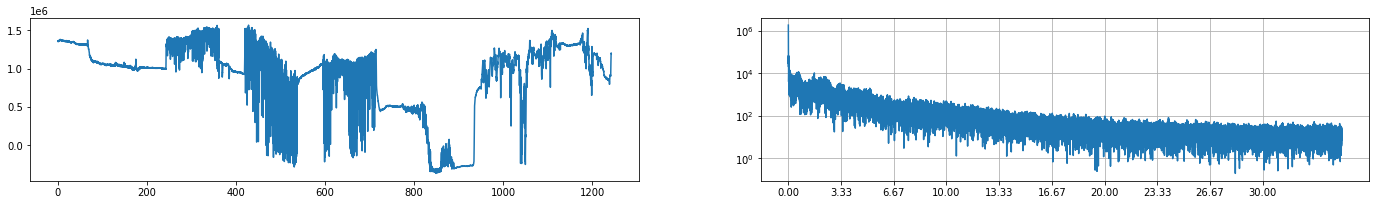

In [ ]:
N1 = np.shape(df1)[0]
fs1 = 70
# sample spacing
T1 = 1.0 /fs1
#y = df['Ch : LED 2'].values

x1 = np.linspace(0.0, N1*T1, N1, endpoint=False)
y1 = df1['850nm'].values
yf1 = fft(y1)
xf1 = fftfreq(N1, T1)[:N1//2]

plt.figure(figsize=(24,3))

plt.subplot(1,2,1)
plt.plot (x1,y1)

plt.subplot(1,2,2)
L1, L2 = 0, 30
plt.plot(xf1[:N1//2], 2.0/N1 * np.abs(yf1[:N1//2]))
plt.xticks(np.linspace(L1, L2, 10) )
plt.yscale('log')
plt.grid()

In [ ]:
import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#fig = make_subplots(rows=1, cols=2, subplot_titles=("Default Scale", "Logarithmic Scale"))
plt.figure(figsize=(24,6))
L1,L2=0,35000
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=xf[L1:L2], y=2.0/N * np.abs(yf[L1:L2]),
                    mode='lines',
                    name='850nm'))

fig.add_trace(go.Scatter(x=xf1[L1:L2], y=2.0/N1 * np.abs(yf1[L1:L2]),
                    mode='lines',
                    name='850nm'))
#fig.update_xaxes(title_text="x-axis in default scale", type='log')
fig.update_yaxes(title_text="y-axis in default scale", type='log')


fig.update_layout(margin=dict(l=100, r=100,b=100,t=100), width=1200, height=800)
fig.update_layout(title='PPG Spectrum',
                   xaxis_title='Frequency (Hz)',
                   yaxis_title='Magnitude')

## Spectral Gram

In [ ]:
def specgram2d(y, srate=44100, ax=None, title=None):
  if not ax:
    ax = plt.axes()
    ax.set_title(title, loc='center', wrap=True)
    spec, freqs, t, im = ax.specgram(y, Fs=fs, scale='dB', vmax=0)
    ax.set_xlabel('time (s)')
    ax.set_ylabel('frequencies (Hz)')
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Amplitude (dB)')
    cbar.minorticks_on()
    return spec, freqs, t, im


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



<Figure size 1728x216 with 0 Axes>

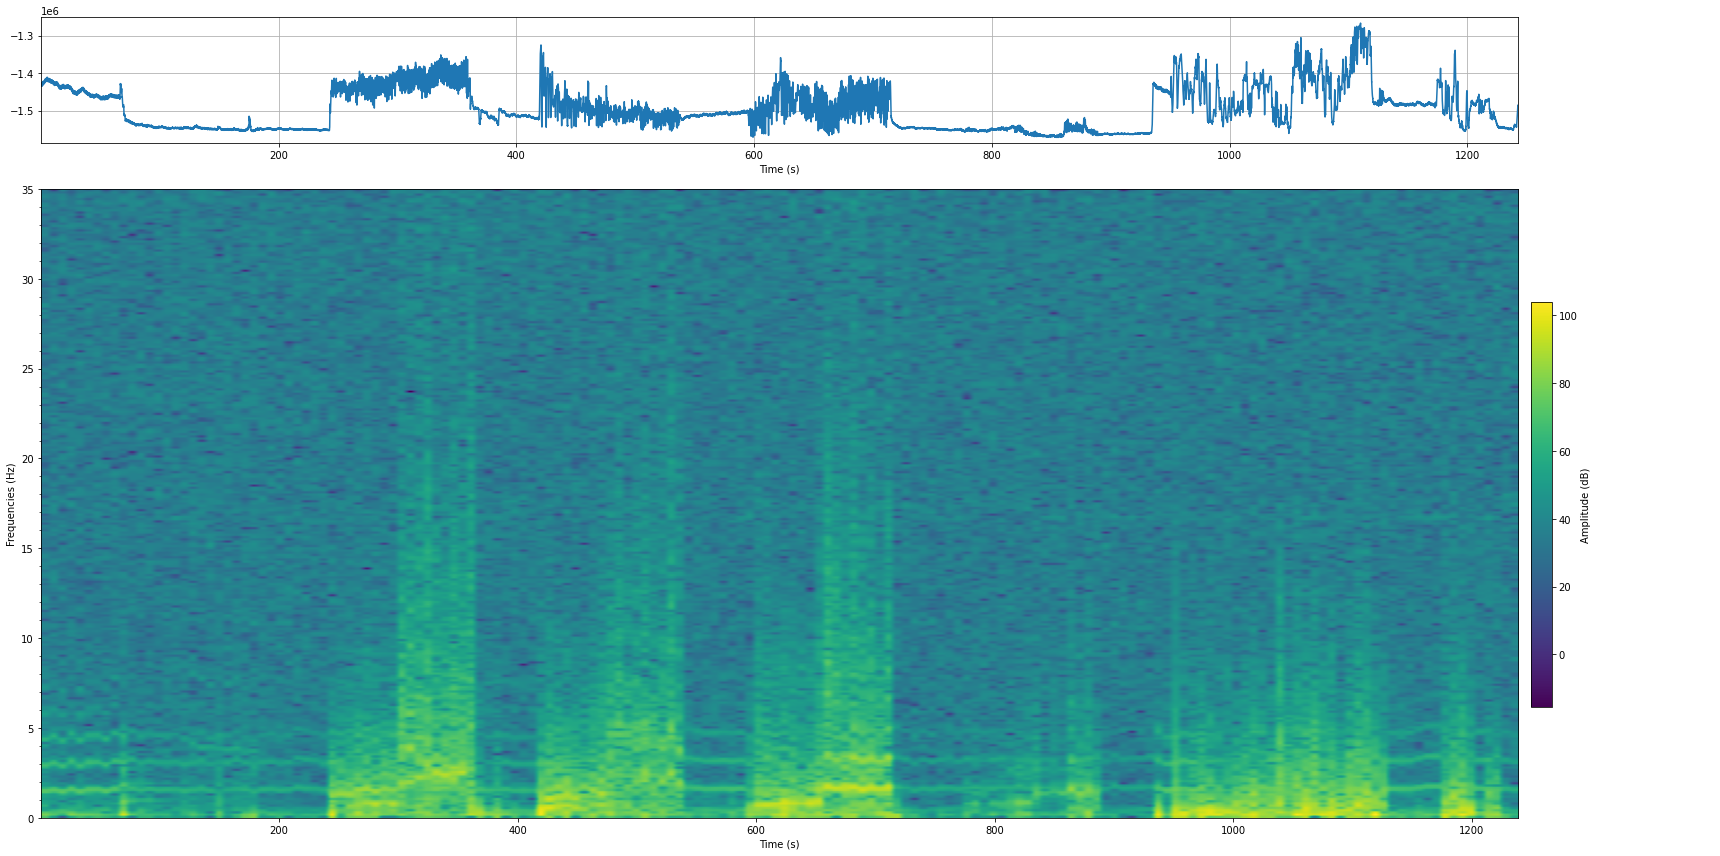

In [18]:
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftfreq
# plot it
plt.figure(figsize=(24,3))
f, ax = plt.subplots(2, 2, gridspec_kw={'height_ratios': [1, 5], 'width_ratios': [8, 1]}, figsize=(24,12))

ax[0][1].axis('off')
ml = AutoMinorLocator(5)
ax[0][0].plot(df1['id'], df1['525nm'].values)
ax[0][0].set_xlabel('Time (s)')
ax[0][0].yaxis.set_minor_locator(ml)
#ax[0][0].xaxis.set_minor_locator(ml)
ax[0][0].grid(which='both')
ax[0][0].margins(x=0)

#plt.grid(True)
spec, freqs, t, im = ax[1][0].specgram(df1['525nm'].values, Fs=70, NFFT = 560, noverlap=50, detrend='mean', mode='psd') #cmap="rainbow"
ax[1][0].yaxis.set_minor_locator(ml)
ax[1][0].set_xlabel('Time (s)')
ax[1][0].set_ylabel('Frequencies (Hz)')

ax[1][1].axis('off')
cbar = plt.colorbar(im, ax=[ax[1][1]], location='right')
cbar.set_label('Amplitude (dB)')

f.tight_layout()

In [ ]:
from matplotlib.ticker import AutoMinorLocator
# plot it
plt.figure(figsize=(24,3))
f, ax = plt.subplots(2, 2, gridspec_kw={'height_ratios': [1, 5], 'width_ratios': [8, 1]}, figsize=(24,12))

ax[0][1].axis('off')
ml = AutoMinorLocator(5)
ax[0][0].plot(df['id'],df['Ch : LED 2'].values)
ax[0][0].set_xlabel('Time (s)')
ax[0][0].yaxis.set_minor_locator(ml)
#ax[0][0].xaxis.set_minor_locator(ml)
ax[0][0].grid(which='both')
ax[0][0].margins(x=0)

nfft = 2000
#plt.grid(True)
spec, freqs, t, im = ax[1][0].specgram(df['Ch : LED 2'].values, Fs=250, NFFT = nfft, noverlap=200, detrend='mean', mode='psd') #cmap="rainbow"
ax[1][0].yaxis.set_minor_locator(ml)
ax[1][0].set_xlabel('Time (s)')
ax[1][0].set_ylabel('Frequencies (Hz)')

ax[1][1].axis('off')
cbar = plt.colorbar(im, ax=[ax[1][1]], location='right')
cbar.set_label('Amplitude (dB)')

f.tight_layout()

In [ ]:
### Using Plotly
from matplotlib.ticker import AutoMinorLocator
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from scipy import signal
# Create figure with secondary y-axis

fig = go.Figure()
nfft = 2000
#plt.grid(True)
#spec, freqs, t, im = ax[1][0].specgram(df['Ch : LED 2'].values, Fs=250, NFFT = nfft, noverlap=200, detrend='mean', mode='psd') #cmap="rainbow"
#w = signal.hann(nfft)#blackman(nfft)
w = signal.blackman(nfft)
freqs, t, Pxx = signal.spectrogram(df['Ch : LED 2'].values, fs=250,window = w, nfft=nfft)

fig.add_trace(go.Heatmap(
    x= t,
    y= freqs,
    z= 10*np.log10(Pxx),
    colorscale='Viridis', #Jet rdbu
    ))

fig.update_layout(margin=dict(l=100, r=100,b=100,t=100), width=1800, height=800)
fig.update_layout(title='PPG Spectrum',
                   xaxis_title='Time (s)',
                   yaxis_title='Frequency (hz)',
                  yaxis={
        "tick0": df.index.min(),
        "dtick": 20,
        "ticks":"outside"
        #"autorange": "reversed",
        #"tickformat": "%H:%M",
    },
    )


In [19]:
### Using Plotly
from matplotlib.ticker import AutoMinorLocator
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from scipy import signal
# Create figure with secondary y-axis
#fig = make_subplots(rows=2, cols=1, insets=[{'l':0.1,'b':0.1, 'h':0.1}])
fig = make_subplots(rows=6, 
                    cols=1, 
                    specs=[
        [{}],
        [{'rowspan':5}],
        [None],
        [None],
        [None],
        [None],],
                    
        shared_xaxes=True,
        #subplot_titles=("test1", "test2"),
        vertical_spacing=0.01)


#minTickLoc = np.linspace(0,120,5)

#fig = go.Figure()
nfft = 1000

w = signal.blackman(nfft)
freqs, t, Pxx = signal.spectrogram(df1['850nm'].values, fs=70,window = w, nfft=nfft)
# trace = [go.Heatmap(
#     x= t,
#     y= freqs,
#     z= 10*np.log10(Pxx),
#     colorscale='Viridis', #Jet rdbu
#     )]
# layout = go.Layout(
#     title = 'Spectrogram with plotly',
#     yaxis = dict(title = 'Frequency'), # x-axis label
#     xaxis = dict(title = 'Time'), # y-axis label
#     )

fig.add_trace(go.Scatter(x=df1['id'], y=df1['850nm'],
                    mode='lines',
                    name='850nm'),
              row = 1, col=1)
fig.update_layout(
    yaxis_title = 'Amplitude'
    )

fig.add_trace(go.Heatmap(
    x= t,
    y= freqs,
    z= 10*np.log10(Pxx),
    colorscale='Viridis', #Jet rdbu
    ), row=2, col=1)

#fig.update_xaxes(title_text="Time (s)", row = 1, col = 1)
fig.update_yaxes(title_text="Frequency (hz)", row = 2, col = 1)
fig.update_xaxes(title_text="Time (s)", row = 2, col = 1)
fig.update_layout(margin=dict(l=100, r=100,b=100,t=100), width=1800, height=800)
fig.update_layout(title_text="PPG Signals")

### Save the figure as a HTML file
# with open('Spectrogram'+'.html', 'a') as f:
#   f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

## EMD Analysis

#ScaloGram

In [20]:
!pip install scaleogram

<Figure size 1728x216 with 0 Axes>

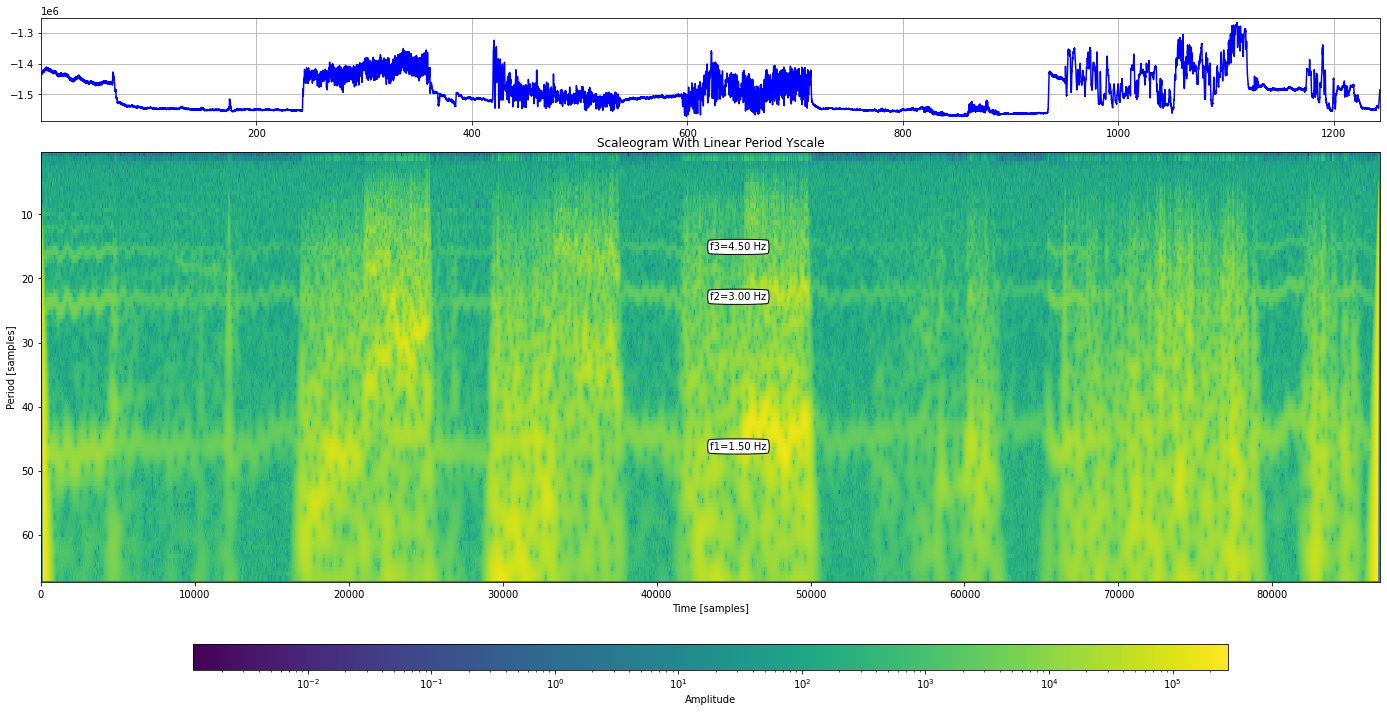

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import scaleogram as scg

from matplotlib.ticker import AutoMinorLocator
# plot it
plt.figure(figsize=(24,3))
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 5]}, figsize=(24,12)) #'width_ratios': [8, 1]

#ax[0][1].axis('off')
#ax[1][1].axis('off')
ml = AutoMinorLocator(5)

wavelet='cmor5-3'  # 
#wavelet= 'shan6-3'
#wavelet = 'fbsp1-1.5-1.0'
#wavelet = 'cgau5'
#n = len(df_rsp1['id'])
Fs = 70
f1 = 1.5; p1 = Fs/f1
f2 = 3.0; p2 = Fs/f2
f3 = 4.5; p3 = Fs/f3
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 12))
fig.subplots_adjust(hspace=0.1)
ax[0].plot(df1['id'],df1['525nm'].values, c='b')
ax[0].margins(x=0)
ax[0].grid(which='both')
#ax1.plot(time, data, c='b');
#ax1.set_xlim(0, n)
#scales_linear  = np.arange(1, 1000)/10.
scales_log = np.logspace(0, 1.8)
n = len(df1['id'])
t = np.arange(n)
ax[1] = scg.cws(t, df1['525nm'].values, scales=np.arange(1, 200, 2), wavelet=wavelet,coi=True, coikw={'alpha':0.5, 'hatch':'/'},
        ax=ax[1], cmap="viridis", cbar='horizontal', ylabel="Period [samples]", xlabel="Time [samples]", cscale='log', cbarlabel='Amplitude', #yscale='log',
        #cbarkw={ 'aspect':30, 'pad':0.03, 'fraction':0.05},
        title='Scaleogram With Linear Period Yscale')
txt = ax[1].annotate("f1=%.2f Hz" % f1, xy=(n/2,p1), xytext=(n/2-10, p1), bbox=dict(boxstyle="round4", fc="w"))
txt = ax[1].annotate("f2=%.2f Hz" % f2, xy=(n/2,p2), xytext=(n/2-10, p2), bbox=dict(boxstyle="round4", fc="w"))
txt = ax[1].annotate("f3=%.2f Hz" % f3, xy=(n/2,p3), xytext=(n/2-10, p3), bbox=dict(boxstyle="round4", fc="w"))
